Usaremos que la probabilidad de dos eventos $A$ y $B$, es decir,  $P(A\cap B)$, es la probabilidad de $A$, $P(A)$, veces la probabilidad de B dado que A ha ocurrido, esto se escribe como $P(B|A)$.

\begin{equation}
P(A ∩ B) = P(A)P(B|A)
\end{equation}

Partimos de lo que nos dice el problema:
La probabilidad de $A$ intersección $B$ también será igual a la probabilidad de $B$ 
veces la probabilidad de $A$ dado $B$. Esto es:

\begin{equation}
P(A ∩ B) = P(B)P(A|B) 
\end{equation}

Insertando la primera ecuación en la segunda obtenemos:

\begin{equation}
P(B)P(A|B) = P(A)P(B|A) 
\end{equation}

Y dividiendo a P(B) en ambas partes se tiene:

\begin{equation}
P(A|B) = P(A) \frac{P(B|A)}{P(B)}
\end{equation}

Que es la ecuación del teorema de Bayes

In [19]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import corner
import scipy
from scipy.stats import chi2

In [20]:
#Primero creamos una recta
sigma = 0.1

x = np.linspace(0,3,30)
y_base = 2*x + 1
y_rand = sigma*np.random.randn(30)
y = y_base + y_rand
y_err = sigma + 0.01*np.random.randn(30)
np.savetxt('recta.txt',(x,y,y_err))

In [21]:
#El modelo sera una recta
def recta(x,a,b):
    return a*x + b

#chi cuadrada
def chisquare(t,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    modelo = recta(x,t[0],t[1])
    chisq = (y-modelo)**2 / y_err**2   
    return chisq.sum()

Text(0.5, 0, 'a')

<Figure size 432x288 with 0 Axes>

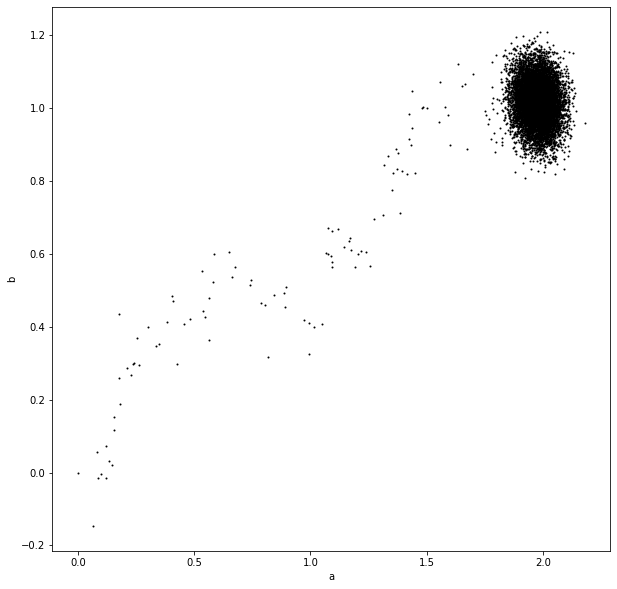

In [22]:
np.random.seed(11)
#Parametros iniciales
ai = 0.
bi = 0.

# sigma de a y b
sigma_a = 0.05
sigma_b = 0.05

a = [ai]
b = [bi]
chi_i = chisquare([ai,bi],[x,y,y_err])
for i in range(10000): 
    #Generamos dos numeros random con los que comparar
    a_rf = np.random.normal(ai,sigma_a) 
    b_rf = np.random.normal(bi,sigma_b) 
    ch_random = chisquare([a_rf,b_rf],[x,y,y_err])
    if ch_random < chi_i:
        a.append(a_rf)
        b.append(b_rf)
        ai = a_rf
        bi = b_rf
        chi_i = ch_random
        
    else:
        r = -np.log(np.random.uniform(0,1))
        resta = abs(ch_random-chi_i)
        if resta<r:
            a.append(a_rf)
            b.append(b_rf)
            ai = a_rf
            bi = b_rf
            chi_i = ch_random

        else:
            a.append(a_rf)
            b.append(b_rf)
            


plt.figure(3)
plt.figure(figsize=(10,10))
plt.scatter(a,b,s=1,color = 'k')
plt.ylabel('b')
plt.xlabel('a')


In [23]:
def metropolis(ai,bi,data,sigma):
    np.random.seed(1)

      #Valores iniciales chi_in
    ch_in = [] 
    for i in range(len(a_ini)):
        ch_in.append(chisquare([a_ini[i][0],b_ini[i][0]],data))
        
    return 